<a href="https://colab.research.google.com/github/alangttl2/Classifiers/blob/main/Proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Distribución de clases:
diagnosis
B    305
M    194
Name: count, dtype: int64
Datos divididos correctamente:
- Conjunto de entrenamiento: 399 muestras
- Conjunto de prueba: 100 muestras

Modelo: Regresión Logística
Modelo de regresión logística entrenado correctamente.
Métricas de evaluación:
- Precisión: 1.00
- ROC AUC: 1.00
- Reporte de clasificación:
              precision    recall  f1-score   support

           B       1.00      1.00      1.00        62
           M       1.00      1.00      1.00        38

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

- Matriz de confusión:
[[62  0]
 [ 0 38]]

Modelo: K-Nearest Neighbors
Modelo K-Nearest Neighbors entrenado correctamente con 3 vecinos.
Métricas de evaluación (K-Nearest Neighbors):
- Precisión: 0.96
- Reporte de clasificación:
              precision    recall  f1-score   support

           B       0.94      1.00

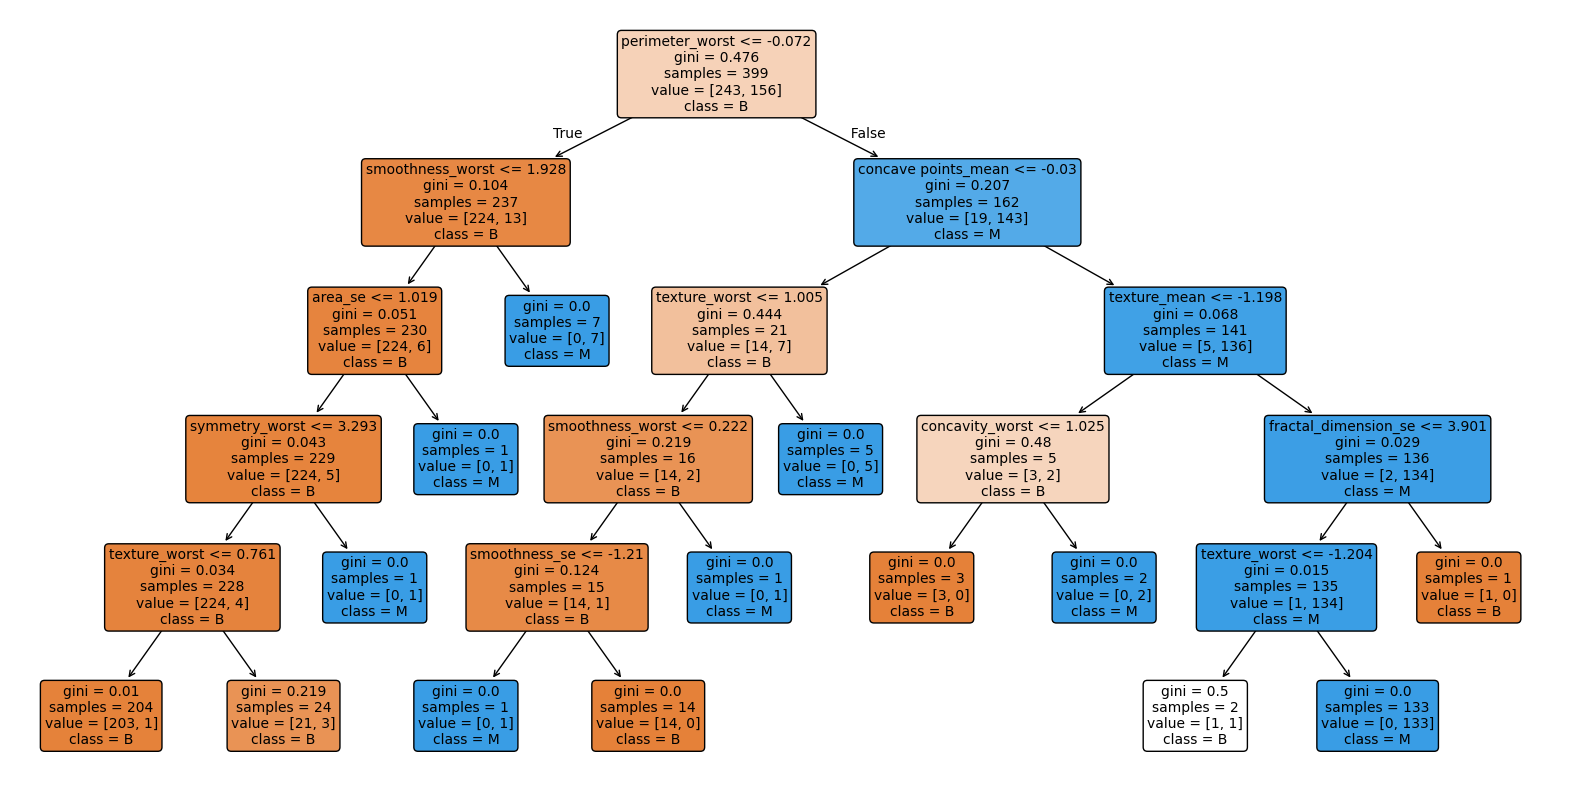


Modelo: Bosque Aleatorio
Modelo de Bosque Aleatorio entrenado correctamente.
Métricas de evaluación (Bosque Aleatorio):
- Precisión: 0.98
- ROC AUC: 1.00
- Reporte de clasificación:
              precision    recall  f1-score   support

           B       0.97      1.00      0.98        62
           M       1.00      0.95      0.97        38

    accuracy                           0.98       100
   macro avg       0.98      0.97      0.98       100
weighted avg       0.98      0.98      0.98       100

- Matriz de confusión:
[[62  0]
 [ 2 36]]

Comparación de Modelos:
                Modelo  Precisión  F1-Score   ROC AUC
0  Regresión Logística       1.00  1.000000  1.000000
1                  KNN       0.96  0.959514       NaN
2                  SVM       0.98  0.979888  1.000000
3    Árbol de Decisión       0.92  0.920000       NaN
4        Random Forest       0.98  0.979888  0.999576


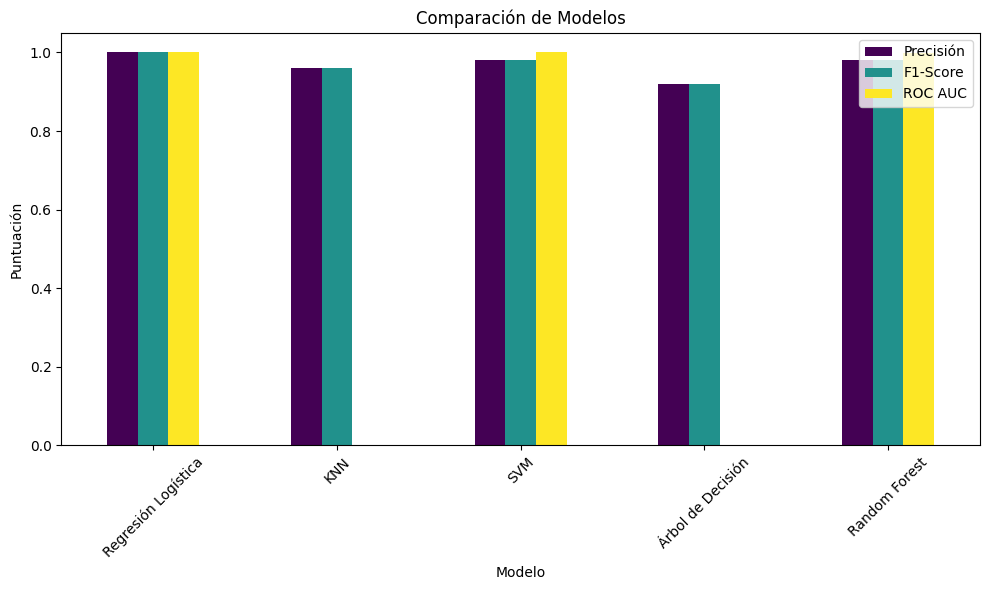

In [24]:
########################### Alan Ledezma Puente ################################

# Este código lo que hace es recibir un archivo llamado "cancer" que contiene
# 499 datos en el cual cada fila de datos determina si cada paciente es un
# paciente con cancer de seno de acuerdo a las caracteristicas, siendo "B" ó "M"
# y en el código se entrenaran dos conjuntos (entrenamiento (80%) y
# de prueba(20%)), del cual cada clasificador tomará los conjuntos para
# entrenarse con los datos de entrenamiento y se evalua usando los datos de
# prueba. Las metricas de evaluación que se incluyen precisión, ROC, AUC, matriz
# de confusión y un reporte clasificación, adicionalmente si las clases en el
# conjunto estan desbalanceadas, el código lo detecta y avisa (no da tecnicas
# manejar ese debalance).

# Importacion de las librerias que vamos a ocupar en el código
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score
)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle


class Clasificadores:
    """
    Clase para manejar y dividir los datos para los modelos de clasificación.
    """
    def __init__(self, ruta_csv, columna_etiquetas, columnas_caracteristicas=None):
        """
        Inicializa la clase con los datos y etiquetas extraídos del archivo CSV.
        """
        self.df = pd.read_csv(ruta_csv) # Abre el archivo CSV
        self.df = shuffle(self.df, random_state=42) #Baraja los datos

        if self.df.isnull().values.any():# Validación de datos faltantes
            raise ValueError(
                "El conjunto de datos contiene valores nulos"
            )

        self.etiquetas = list(self.df[columna_etiquetas])
        self.caracteristicas = (
            self.df.iloc[:, 2:] if columnas_caracteristicas is None else
            self.df[columnas_caracteristicas])

        clase_conteo = self.df[columna_etiquetas].value_counts()
        print("Distribución de clases:")
        print(clase_conteo)

        if (clase_conteo.min() / clase_conteo.max()) < 0.5:
            print("Las clases están desbalanceadas.")

        self.x_train = None
        self.x_test = None
        self.y_train = None
        self.y_test = None

    def dividir_datos(self, test_size=0.2, random_state=42):
        """
        Divide los datos en conjuntos de entrenamiento y prueba y escala los datos.
        """
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(
            self.caracteristicas, self.etiquetas, test_size=test_size,
            random_state=random_state)

        scaler = StandardScaler()
        self.x_train = scaler.fit_transform(self.x_train)
        self.x_test = scaler.transform(self.x_test)

        print("Datos divididos correctamente:")
        print(f"- Conjunto de entrenamiento: {len(self.x_train)} muestras")
        print(f"- Conjunto de prueba: {len(self.x_test)} muestras")


class RegresionLogistica:
    """
    Clase para el modelo de Regresión Logística.
    """
    def __init__(self, clasificadores):
        """
        Inicializa el modelo de Regresión Logística.
        """
        self.clasificadores = clasificadores
        self.modelo = LogisticRegression(max_iter=1000, solver='lbfgs')

    def entrenar(self):
        """
        Entrena el modelo con los datos de entrenamiento.
        """
        if self.clasificadores.x_train is None or self.clasificadores.y_train\
         is None:
            raise ValueError("Divide los datos llamando a 'dividir_datos()' en Clasificadores.")
        self.modelo.fit(self.clasificadores.x_train, self.clasificadores.y_train)
        print("Modelo de regresión logística entrenado correctamente.")

    def evaluar(self):
        """
        Evalúa el modelo con los datos de prueba y muestra métricas de rendimiento.
        """
        if self.clasificadores.x_test is None or self.clasificadores.y_test is None:
            raise ValueError("Divide los datos llamando a 'dividir_datos()' en Clasificadores.")
        y_pred = self.modelo.predict(self.clasificadores.x_test)
        y_pred_proba = self.modelo.predict_proba(self.clasificadores.x_test)[:, 1]

        print("Métricas de evaluación:")
        # Es la proporción de predicciones positivas correctas.
        print(f"- Precisión: {accuracy_score(self.clasificadores.y_test, y_pred):.2f}")
        # ROC AUC mide qué tan bien separa el modelo las clases.
        print(f"- ROC AUC: {roc_auc_score(self.clasificadores.y_test, y_pred_proba):.2f}")
        print("- Reporte de clasificación:")
        print(classification_report(self.clasificadores.y_test, y_pred))
        # Muestra como se clasificaron los datos por clase.
        print("- Matriz de confusión:")
        print(confusion_matrix(self.clasificadores.y_test, y_pred))


class KNearestNeighbors:
    def __init__(self, clasificadores, n_neighbors=5):
        """
        Inicializa el modelo de K-Nearest Neighbors.
        :param clasificadores: Instancia de la clase Clasificadores.
        :param n_neighbors: Número de vecinos a considerar.
        """
        self.clasificadores = clasificadores
        self.modelo = KNeighborsClassifier(n_neighbors=n_neighbors)

    def entrenar(self):
        """
        Entrena el modelo KNN con los datos de entrenamiento.
        """
        if self.clasificadores.x_train is None or self.clasificadores.y_train is None:
            raise ValueError("Divide los datos llamando a 'dividir_datos()' en Clasificadores.")
        self.modelo.fit(self.clasificadores.x_train, self.clasificadores.y_train)
        print(f"Modelo K-Nearest Neighbors entrenado correctamente con {self.modelo.n_neighbors} vecinos.")

    def evaluar(self):
        """
        Evalúa el modelo KNN con los datos de prueba y muestra métricas de rendimiento.
        """
        if self.clasificadores.x_test is None or self.clasificadores.y_test is None:
            raise ValueError("Divide los datos llamando a 'dividir_datos()' en Clasificadores.")
        y_pred = self.modelo.predict(self.clasificadores.x_test)
        print("Métricas de evaluación (K-Nearest Neighbors):")
        print(f"- Precisión: {accuracy_score(self.clasificadores.y_test, y_pred):.2f}")
        print("- Reporte de clasificación:")
        print(classification_report(self.clasificadores.y_test, y_pred))
        print("- Matriz de confusión:")
        print(confusion_matrix(self.clasificadores.y_test, y_pred))


class SVM:
    """
    Clase para el modelo de Máquinas de Vectores de Soporte (SVM).
    """
    def __init__(self, clasificadores, kernel='linear', C=1.0):
        """
        Inicializa el modelo de Máquinas de Vectores de Soporte (SVM).
        :param clasificadores: Instancia de la clase Clasificadores.
        :param kernel: Función de kernel a utilizar.
        :param C: Parámetro de regularización.
        """
        self.clasificadores = clasificadores
        self.modelo = SVC(kernel=kernel, C=C, probability=True)
    def entrenar(self):
        """
        Entrena el modelo SVM con los datos de entrenamiento.
        """
        if self.clasificadores.x_train is None or self.clasificadores.y_train is None:
            raise ValueError("Divide los datos llamando a 'dividir_datos()' en Clasificadores.")
        self.modelo.fit(self.clasificadores.x_train, self.clasificadores.y_train)
        print(f"Modelo SVM entrenado correctamente='{self.modelo.kernel}' y C={self.modelo.C}.")

    def evaluar(self):
      """
      Evalúa el modelo con lods datos de prueba y muestra la metrica de rendimiento
      """
      if self.clasificadores.x_test is None or self.clasificadores.y_test is None:
            raise ValueError("Divide los datos llamando a 'dividir_datos()' en Clasificadores.")
      y_pred = self.modelo.predict(self.clasificadores.x_test)
      y_pred_proba = self.modelo.predict_proba(self.clasificadores.x_test)[:, 1]

      print("Métricas de evaluación (SVM):")
      print(f"- Precisión: {accuracy_score(self.clasificadores.y_test, y_pred):.2f}")
      print(f"- ROC AUC: {roc_auc_score(self.clasificadores.y_test, y_pred_proba):.2f}")
      print("- Reporte de clasificación:")
      print(classification_report(self.clasificadores.y_test, y_pred))
      print("- Matriz de confusión:")
      print(confusion_matrix(self.clasificadores.y_test, y_pred))

class ArbolDecision:
    """
    Clase para el modelo de Árbol de Decisión.
    """
    def __init__(self, clasificadores, max_depth=None, random_state=42):
        """
        Inicializa el modelo de Árbol de Decisión.
        :param clasificadores: Instancia de la clase Clasificadores.
        :param max_depth: Profundidad máxima del árbol.
        :param random_state: Semilla para reproducibilidad.
        """
        self.clasificadores = clasificadores
        self.modelo = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)

    def entrenar(self):
        """
        Entrena el modelo de Árbol de Decisión con los datos de entrenamiento.
        """
        if self.clasificadores.x_train is None or self.clasificadores.y_train is None:
            raise ValueError("Divide los datos llamando a 'dividir_datos()' en Clasificadores.")
        self.modelo.fit(self.clasificadores.x_train, self.clasificadores.y_train)
        print(f"Modelo de Árbol de Decisión entrenado correctamente (max_depth={self.modelo.get_depth()}).")

    def evaluar(self):
        """
        Evalúa el modelo de Árbol de Decisión con los datos de prueba y muestra métricas de rendimiento.
        """
        if self.clasificadores.x_test is None or self.clasificadores.y_test is None:
            raise ValueError("Divide los datos llamando a 'dividir_datos()' en Clasificadores.")
        y_pred = self.modelo.predict(self.clasificadores.x_test)
        print("Métricas de evaluación (Árbol de Decisión):")
        print(f"- Precisión: {accuracy_score(self.clasificadores.y_test, y_pred):.2f}")
        print("- Reporte de clasificación:")
        print(classification_report(self.clasificadores.y_test, y_pred))
        print("- Matriz de confusión:")
        print(confusion_matrix(self.clasificadores.y_test, y_pred))

    def graficar_arbol(self, feature_names):
        """
        Grafica la estructura del Árbol de Decisión.
        :param feature_names: Lista de nombres de las características.
        """
        plt.figure(figsize=(20, 10))
        plot_tree(
            self.modelo,
            feature_names=feature_names,
            class_names=[str(clase) for clase in np.unique
             (self.clasificadores.y_train)],
            filled=True,
            rounded=True,
            fontsize=10
        )
        plt.show()


class BosqueAleatorio:
    """
    Clase para el modelo de RandomForest
    """
    def __init__(self, clasificadores, n_estimators=100, max_depth=None, random_state=42):
        """
        Inicializa el modelo de Bosque Aleatorio.
        :param clasificadores: Instancia de la clase Clasificadores.
        :param n_estimators: Número de árboles en el bosque.
        :param max_depth: Profundidad máxima de cada árbol.
        :param random_state: Semilla para reproducibilidad.
        """
        self.clasificadores = clasificadores
        self.modelo = RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth, random_state=random_state
        )

    def entrenar(self):
        """
        Entrena el modelo de Bosque Aleatorio con los datos de entrenamiento.
        """
        if self.clasificadores.x_train is None or self.clasificadores.y_train is None:
            raise ValueError("Divide los datos llamando a 'dividir_datos()' en Clasificadores.")
        self.modelo.fit(self.clasificadores.x_train, self.clasificadores.y_train)
        print("Modelo de Bosque Aleatorio entrenado correctamente.")

    def evaluar(self):
        """
        Evalúa el modelo de Bosque Aleatorio con los datos de prueba y
        muestra métricas de rendimiento.
        """
        if self.clasificadores.x_test is None or self.clasificadores.y_test is None:
            raise ValueError("Divide los datos llamando a 'dividir_datos()' en Clasificadores.")
        y_pred = self.modelo.predict(self.clasificadores.x_test)
        y_pred_proba = self.modelo.predict_proba(self.clasificadores.x_test)[:, 1]

        print("Métricas de evaluación (Bosque Aleatorio):")
        print(f"- Precisión: {accuracy_score(self.clasificadores.y_test, y_pred):.2f}")
        print(f"- ROC AUC: {roc_auc_score(self.clasificadores.y_test, y_pred_proba):.2f}")
        print("- Reporte de clasificación:")
        print(classification_report(self.clasificadores.y_test, y_pred))
        print("- Matriz de confusión:")
        print(confusion_matrix(self.clasificadores.y_test, y_pred))

    def importancia_caracteristicas(self):
        """
        Muestra la importancia de cada característica en el modelo de RandomF.
        """
        importancias = self.modelo.feature_importances_
        nombres = self.clasificadores.caracteristicas.columns
        indices = np.argsort(importancias)[::-1]

        print("Importancia de características:")
        for i in indices:
            print(f"{nombres[i]}: {importancias[i]:.4f}")

        plt.figure(figsize=(10, 6))
        plt.title("Importancia de las características")
        plt.bar(range(len(importancias)), importancias[indices], align="center")
        plt.xticks(range(len(importancias)), nombres[indices], rotation=90)
        plt.tight_layout()
        plt.show()


# Clase ComparadorModelos
class ComparadorModelos:
    """
    Clase para comparar los modelos de clasificación.
    """
    def __init__(self):
        self.resultados = []

    def agregar_resultado(self, nombre_modelo, y_test, y_pred, y_pred_proba=None):
        """
        Agrega los resultados de un modelo al comparador.
        """
        precision = accuracy_score(y_test, y_pred)
        f1 = classification_report(y_test, y_pred, output_dict=True)\
         ['weighted avg']['f1-score']
        roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
        self.resultados.append({
            'Modelo': nombre_modelo,
            'Precisión': precision,
            'F1-Score': f1,
            'ROC AUC': roc_auc
        })

    def mostrar_comparacion(self):
        """
        Muestra los resultados de los modelos.
        """
        df_resultados = pd.DataFrame(self.resultados)
        print("\nComparación de Modelos:")
        print(df_resultados)

        # Gráfico de la comparación
        df_resultados.set_index("Modelo").plot(kind="bar", figsize=(10, 6), colormap="viridis")
        plt.title("Comparación de Modelos")
        plt.ylabel("Puntuación")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


# Función principal
def main():
    """
    Función principal que ejecuta los modelos de clasificación.
    """
    # Ruta al archivo CSV
    ruta_csv = "/content/drive/MyDrive/cancer.csv"
    clasificador = Clasificadores(ruta_csv, columna_etiquetas="diagnosis")

    # Dividir los datos en entrenamiento y prueba
    clasificador.dividir_datos()

    # Comparador de Modelos
    comparador = ComparadorModelos()

    # Regresión Logística
    print("\nModelo: Regresión Logística")
    modelo_rl = RegresionLogistica(clasificador)
    modelo_rl.entrenar()
    modelo_rl.evaluar()

    # Agregar resultados al comparador
    y_pred_rl = modelo_rl.modelo.predict(clasificador.x_test)
    y_pred_proba_rl = modelo_rl.modelo.predict_proba(clasificador.x_test)[:, 1]
    comparador.agregar_resultado("Regresión Logística", clasificador.y_test, y_pred_rl, y_pred_proba_rl)

    # K-Nearest Neighbors
    print("\nModelo: K-Nearest Neighbors")
    modelo_knn = KNearestNeighbors(clasificador, n_neighbors=3)
    modelo_knn.entrenar()
    modelo_knn.evaluar()

    # Agregar resultados al comparador
    y_pred_knn = modelo_knn.modelo.predict(clasificador.x_test)
    comparador.agregar_resultado("KNN", clasificador.y_test, y_pred_knn)

    # Máquinas de soporte vectorial (SVM)
    print("\nModelo: SVM")
    modelo_svm = SVM(clasificador, kernel='linear', C=1.0)
    modelo_svm.entrenar()
    modelo_svm.evaluar()

    # Agrega resultados al comparador
    y_pred_svm = modelo_svm.modelo.predict(clasificador.x_test)
    y_pred_proba_svm = modelo_svm.modelo.predict_proba(clasificador.x_test)[:, 1]
    comparador.agregar_resultado("SVM", clasificador.y_test, y_pred_svm, y_pred_proba_svm)

    # Árbol de Decisión
    print("\nModelo: Árbol de Decisión")
    modelo_ad = ArbolDecision(clasificador, max_depth=5)
    modelo_ad.entrenar()
    modelo_ad.evaluar()
    modelo_ad.graficar_arbol(feature_names=clasificador.caracteristicas.columns)

    # Agregar resultados al comparador
    y_pred_ad = modelo_ad.modelo.predict(clasificador.x_test)
    comparador.agregar_resultado("Árbol de Decisión", clasificador.y_test, y_pred_ad)

    # Bosque Aleatorio
    print("\nModelo: Bosque Aleatorio")
    modelo_rf = BosqueAleatorio(clasificador, n_estimators=100, max_depth=5)
    modelo_rf.entrenar()
    modelo_rf.evaluar()

    # Agregar resultados al comparador
    y_pred_rf = modelo_rf.modelo.predict(clasificador.x_test)
    y_pred_proba_rf = modelo_rf.modelo.predict_proba(clasificador.x_test)[:, 1]
    comparador.agregar_resultado("Random Forest", clasificador.y_test, y_pred_rf, y_pred_proba_rf)

    # Para la comparación
    comparador.mostrar_comparacion()


# Si el script se ejecuta directamente, se llama al main
if __name__ == "__main__":
    main()
